# $k$-Means Clustering

$k$-means clustering is an algorithm in unsupervised learning. This means that the algorithm doesn't have any particular targets that it's aiming for, instead it attempts to identify important features in the data.

The $k$-means clustering algorithm takes a dataset, and uses its distribution to divide the data into clusters. The idea is that each cluster will contain data points with similar characteristics. You can think of $k$-means clustering as classification, except we don't know what the classes are ahead of time.

As an example of $k$-means clustering, we'll perform clustering on the iris dataset. Since the $k$-means clustering algorithm is unsupervised, we use only the feature data, and not the targets.

In [ ]:
import pandas as pd

iris_df = pd.read_csv('https://raw.githubusercontent.com/sziccardi/MLCamp2025_DataRepository/main/iris.csv')

features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

cluster_df = iris_df[features]

cluster_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We'll use pairplot to visualize the distribution of the data. Notice that, unlike our previous plots of the iris dataset, we haven't colored datapoints according to species. This is because we're ignoring the target values, and instead going to use the $k$-means clustering algorithm to group the data.

<Figure size 640x480 with 0 Axes>

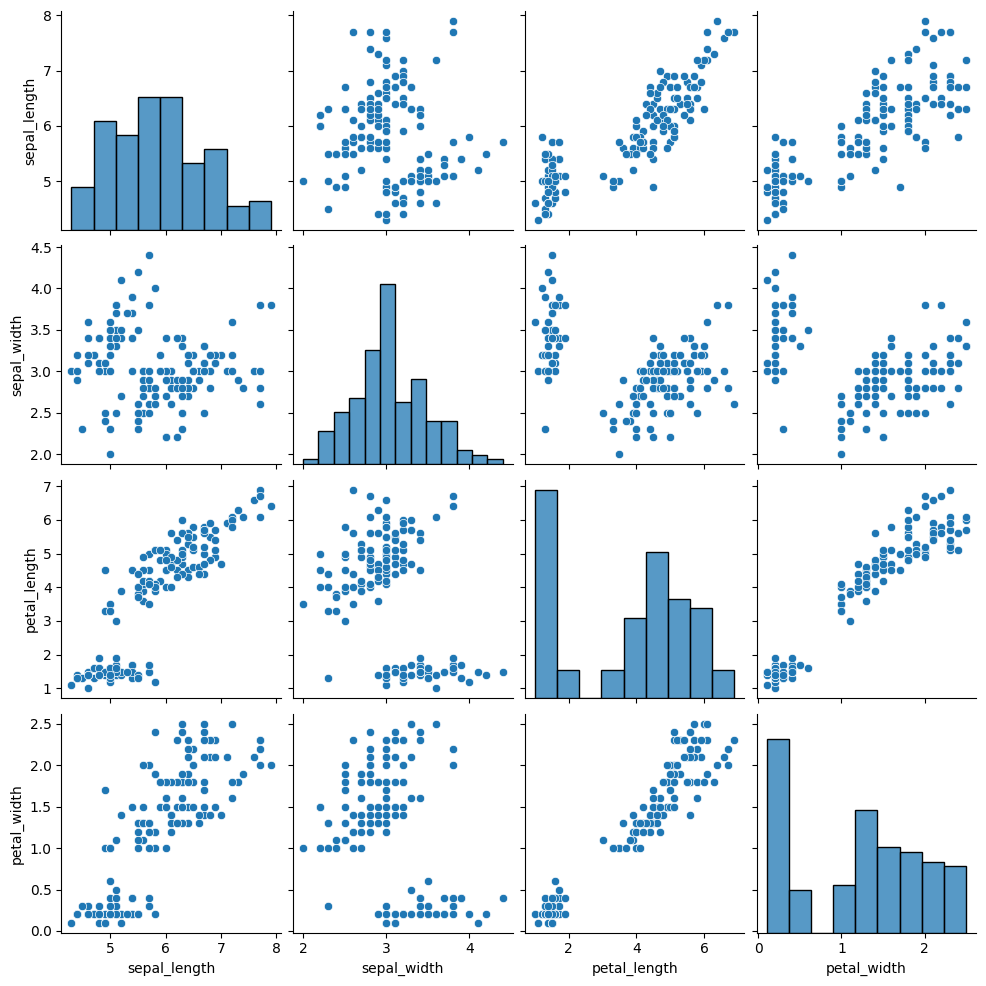

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.pairplot(cluster_df, vars=cluster_df.columns)
plt.show()

Imagine you don't know anything about the species of irises - do you see any natural grouping in the data?

Now, we will use the $k$-means algorithm to divide our data into clusters. The "$k$" in $k$-means tells us how many clusters we are creating, and this is a parameter for the algorithm.

# STOP HERE! 🛑

Does anybody remember the names of the three species?
Why do you think those few setosa scattered into the versicolor group?


# Lets continue! 🟢


From looking at the pairplots above, it looks like having two clusters might be reasonable. So, we begin by creating 2 clusters.

In [ ]:
from sklearn import cluster

X = cluster_df.values

kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

We'll now investigate the clusters formed by our data. We check the centers for each cluster, and the labels for each datapoint. Here, the labels indicate which cluster they have been assigned to.

In [ ]:
print(kmeans.cluster_centers_)

[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36037736 1.56226415 0.28867925]]


In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In order to see how the datapoints in the clusters are distributed, we'll plot the data again, this time coloring points according to which cluster they belong to. In order to do this, we create a copy of our dataframe, and add the cluster labels to the dataframe.

<Figure size 640x480 with 0 Axes>

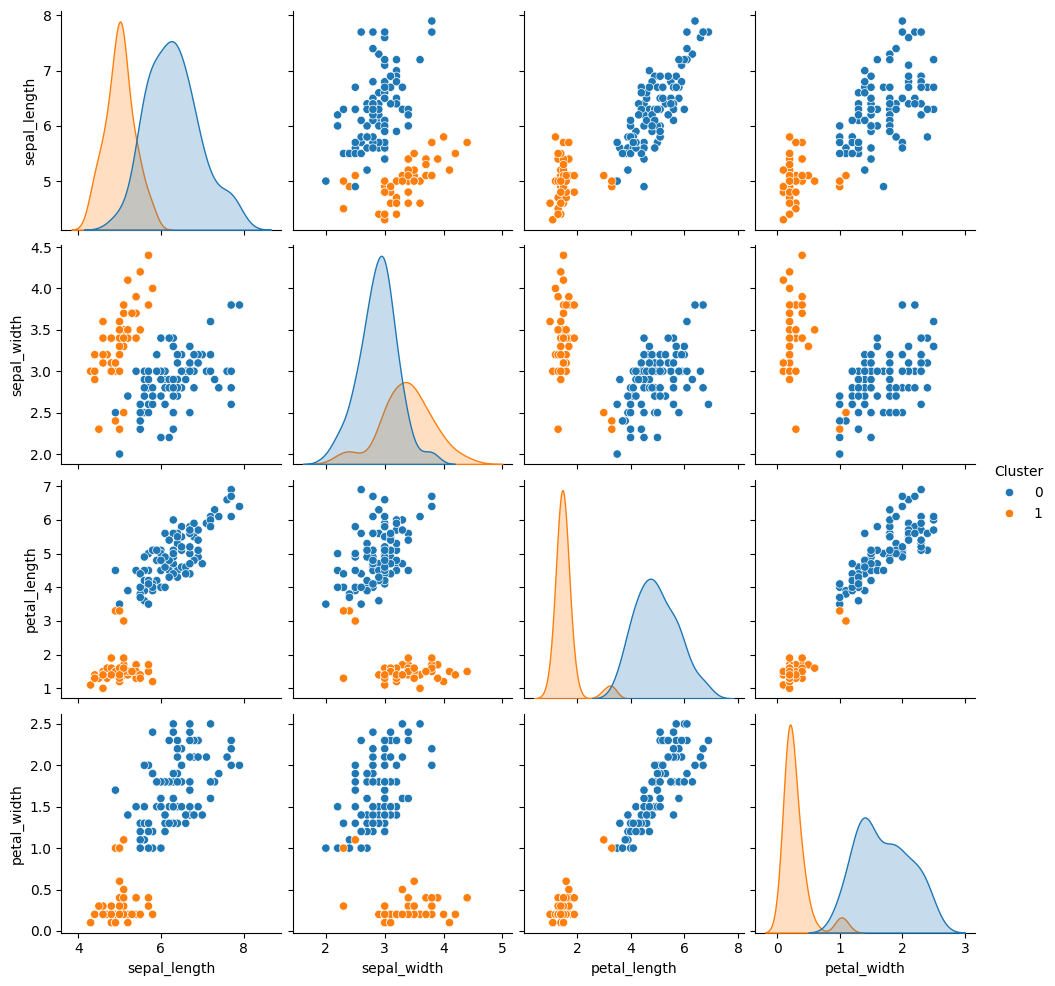

In [ ]:
import numpy as np

copy_df = cluster_df.copy(deep=True)

copy_df['Cluster'] = kmeans.labels_

plt.figure()
sns.pairplot(copy_df, vars=copy_df.columns[:-1], hue="Cluster")
plt.show()

From this, we see that datapoints have been divided into two clusters based on distance, though perhaps this isn't exactly the division that we would have chosen if we were doing the clustering ourselves.

Of course, we know that the data from the iris dataset represents three species of iris, so the most natural number of clusters to consider is 3. We'll now run the $k$-means clustering algorithm with $k=3$, and compare our results to the actual species values for the datapoints. Normally, when you're clustering, you don't have a "right" answer to compare your results to - but in this case we do.

Again, we create the clusters, and check the cluster centers and the labels.

In [ ]:
kmeans3 = cluster.KMeans(n_clusters=3)
kmeans3.fit(X)

print(kmeans3.cluster_centers_)
print(kmeans3.labels_)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


Next, we plot the data, colored according to the three clusters.

<Figure size 640x480 with 0 Axes>

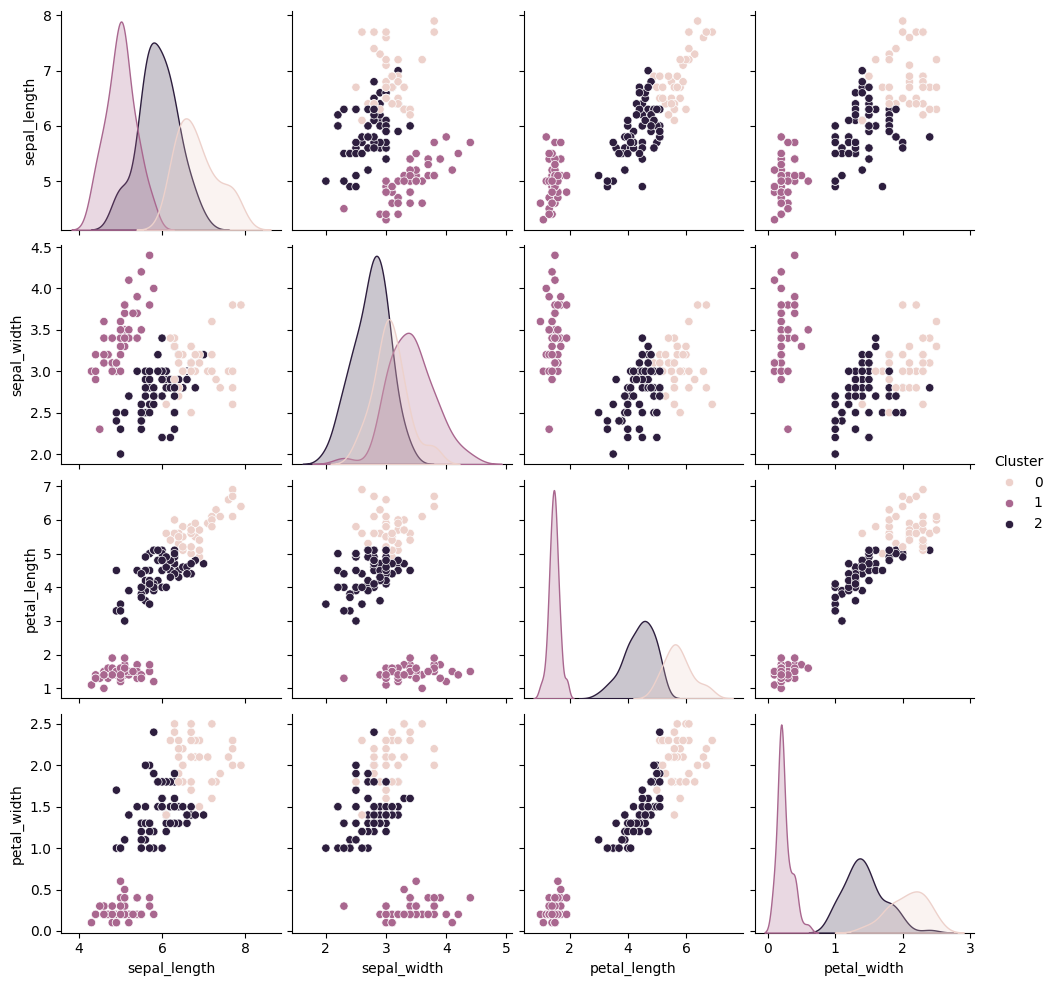

In [ ]:
copy3_df = cluster_df.copy(deep=True)

copy3_df['Cluster'] = kmeans3.labels_

plt.figure()
sns.pairplot(copy3_df, vars=copy3_df.columns[:-1], hue="Cluster")
plt.show()

# STOP HERE! 🛑

Why are the centers a list of 4 values?
Does it look like picking 3 groups worked better than 2?

# Lets continue! 🟢


These clusters look somewhat familiar from plotting the iris dataset with the actual species for each datapoint, but how well does this actually match up? Let's investigate.

The $k$-means clustering algorithm has labeled its clusters as 0,1,2, and the target species in the iris dataset are the species name. We'll use the pandas crosstab method to see how these match up for counts.

In [ ]:
actual_species = iris_df['species']
cluster_number = kmeans3.labels_

pd.crosstab(actual_species, cluster_number)

col_0,0,1,2
species,,,
setosa,0,50,0
versicolor,2,0,48
virginica,36,0,14


This table tells us how many of each iris species are in each cluster. The $k$-means clustering algorithm has done a perfect job of separating the setosa species - every setosa iris is in cluster 1, and there are no other species in the cluster. Cluster 0 is mostly versicolor, but also has quite a few versicolor. Cluster 2 is mostly virginica, and has two versicolor.

Even without knowing anything about the iris species, the $k$-means clustering algorithm has done an impressively accurate job of separating the irises into species!

## Exercise 1: $k$-means clustering on another dataset

Perform $k$-means clustering on another dataset, for multiple values of $k$. You may choose to do this for one of the other datasets from our github repository (for example, the breast cancer dataset).

Although the $k$-means algorithm is often used to discover previously unknown patterns and groupings in a dataset, for the classification datasets, we have target values to compare our results to. Compare the clusters found by the $k$-means algorithm with the actual classes from the dataset.

Cluster       0    1
True_Label          
0            13  344
1           175   37


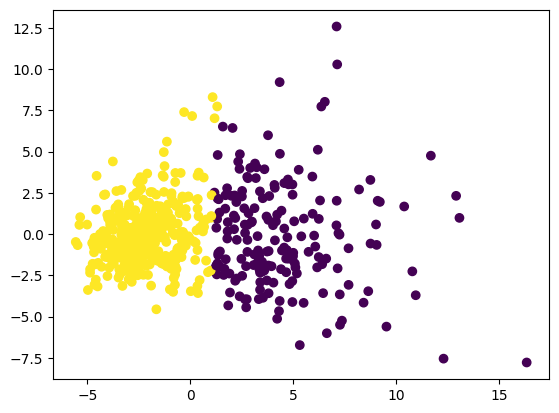

In [ ]:
import pandas as pd

bc_data = pd.read_csv('https://raw.githubusercontent.com/sziccardi/MLCamp2025_DataRepository/main/breast_cancer.csv')

# 1.
import pandas as pd
from sklearn.preprocessing import StandardScaler
url = 'https://raw.githubusercontent.com/sziccardi/MLCamp2025_DataRepository/main/breast_cancer.csv'
bc_data = pd.read_csv(url)
features = bc_data.columns[2:-1]
X = bc_data[features]
X_scaled = StandardScaler().fit_transform(X)

# 2.（k=2）
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
bc_data['Cluster'] = kmeans.fit_predict(X_scaled)

# 3.
diagnosis_map = {'M': 1, 'B': 0}
bc_data['True_Label'] = bc_data['diagnosis'].map(diagnosis_map)
print(pd.crosstab(bc_data['True_Label'], bc_data['Cluster']))

# 4.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
X_pca = PCA(n_components=2).fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=bc_data['Cluster'], cmap='viridis')
plt.show()